In [139]:
# dataset 불러오기
import pandas as pd
import numpy as np
import matplotlib as plt
# jupyter에서 matplotlib의 결과를 아래 바로 보이게 하기 위해 %matplotlib inline을 입력합니다.
%matplotlib inline

# 다운로드 받은 데이터를 pandas의 dataframe형태로 읽어옵니다.
df = pd.read_csv("/home/cluster/Desktop/train_u6lujuX_CVtuZ9i.csv")

In [ ]:
# Quick Data Exploration

In [46]:
# head(N)의 함수를 통해 데이터 top N을 출력을 할 수 있습니다.
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban,NaN
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban,NaN
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban,NaN
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,NaN,Urban,NaN
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban,NaN
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban,NaN
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban,NaN
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural,NaN
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280,240,1,Urban,NaN
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban,NaN


In [54]:
# numerical variables의 summary를 확인 할 수 있습니다. 
# describe()는 count, mean, std, min, quartiles, 그리고 max의 값을 ouput으로 반환합니다.
df.describe()

# 여기서 우리가 추론(inferences)이 가능합니다. 
# 1. LoanAmount의 count를 보면 다른 column의 count보다 개수가 부족한 것을 알 수 있습니다. 즉, (614-692) 22 missing value
# 2. Loan_Amount_Term, Credit_History의 값도 LoanAmount와 동일하게 missing values 발생
# 3. Credit_History의 경우 값(0,1)을 갖고 있기 때문에, 평균(84%)는 credit_history를 갖고 있다. 라고 말할 수 있음
# 4. ApplicationIncome의 distribution은 CoapplicantIncome과 유사한 형태를 보여주고 있다.


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
# non-numerical values에 대해서는 (e.g. Gender, Married, Education, Property_Area etc.)
df['Property_Area'].value_counts() 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
# Distribution analysis

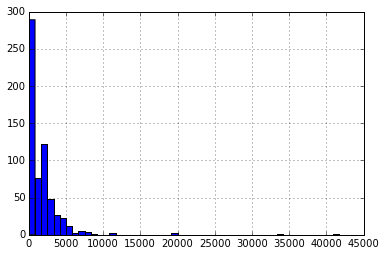

In [60]:
# ApplicantIncome을 histogram으로 표현
df['CoapplicantIncome'].hist(bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fbfc009f410>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbfc0080ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbfc00052d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbfbffdcb50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbfc00ad7d0>,
  <matplotlib.lines.Line2D at 0x7fbfc0064390>]}

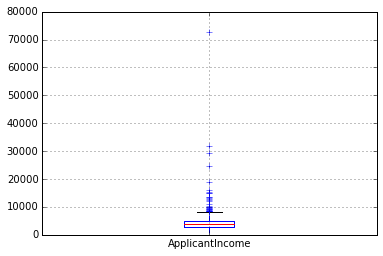

In [19]:
# ApplicantIncome의 분포를 확인하기 위해서 boxplot으로 표현하면 아래와 같습니다.
# 아래 차트를 보면 outliters/extreme values가 많은 것을 볼 수 있습니다. 즉, 사회에 income disparity가 있다.
df.boxplot(column='ApplicantIncome')

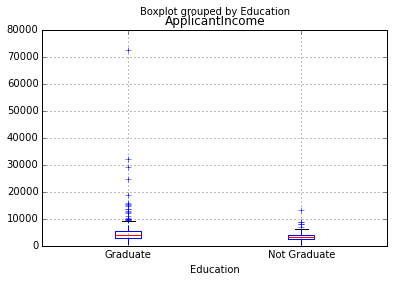

In [20]:
# 사회에 income disparity가 있다면 Education의 차이에 따라서 구분을 지면
# Graduate의 수입 mean이 Not Graduate보다 높은 것을 볼 수 있다. 또한 Graduate에서는 High incomes가 보이고, outlier로 나타난다.
df.boxplot(column='ApplicantIncome', by = 'Education')

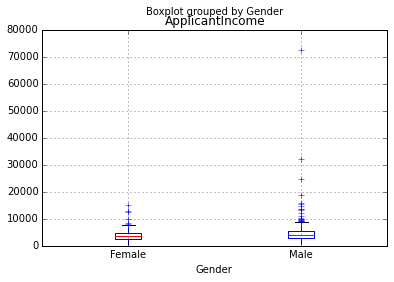

In [21]:
# Gender로 그룹을 나눈 상황은 아래와 같다. Male이 Female보다 high incomes가 많은 것을 볼 수 있음
df.boxplot(column='ApplicantIncome', by = 'Gender')

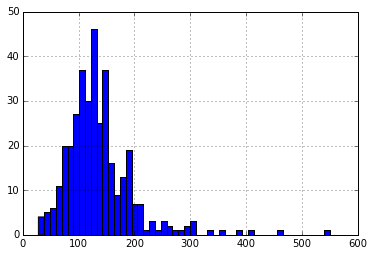

In [22]:
df['LoanAmount'].hist(bins=50)

{'boxes': [<matplotlib.lines.Line2D at 0x7fbfbc15e390>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbfbc09a410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbfbbfe4850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbfbc021910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbfbc1871d0>,
  <matplotlib.lines.Line2D at 0x7fbfbc0d8b90>]}

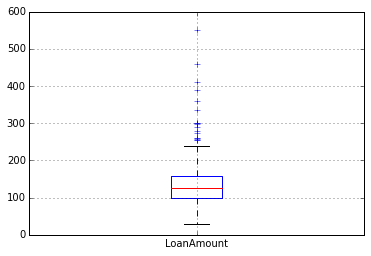

In [23]:
df.boxplot(column='LoanAmount')

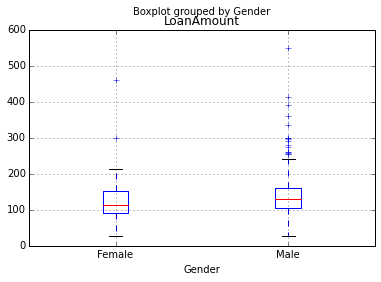

In [24]:
df.boxplot(column='LoanAmount', by='Gender')

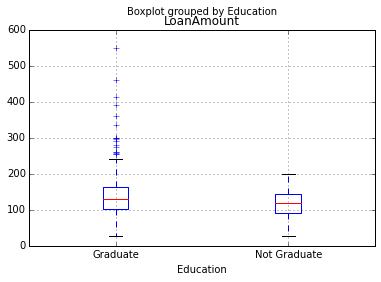

In [26]:
df.boxplot(column='LoanAmount', by='Education')

In [ ]:
# 결론적으로 LoanAmount, ApplicantIncome은 extreme values를 갖고 있기 때문에, data munging이 필요하다.

In [ ]:
# Categorical variable analysis

In [72]:
temp1 = df['Credit_History'].value_counts(ascending=True) 
print 'Frequency Table for Credit History:' 
print temp1

# Credit_History에 따른 Loan_Status의 mean값을 계산
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print '\nProbility of getting loan for each Credit History class:' 
print temp2 

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


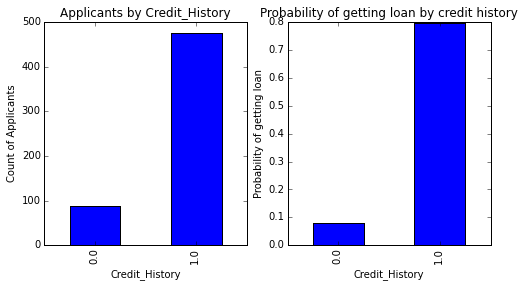

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))

temp1.plot(kind='bar')
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")

temp2.plot(kind = 'bar')
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

# 결과적으로 8배의 credit_history가 이는 경우 더 많은 loan의 기회를 얻는다.

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


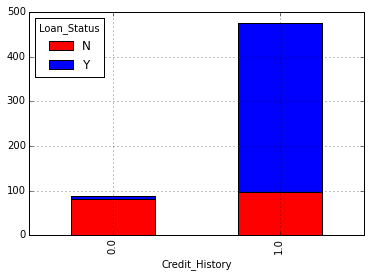

In [78]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status']) 
print temp3
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=True)

In [34]:
# Data Munging in Python: using Pandas
'''
1. There are missing values in some variables. 
We should estimate those values wisely depending on the amount of missing values 
and the expected importance of variables.
2. While looking at the distributions, we saw that ApplicantIncome and 
LoanAmount seemed to contain extreme values at either end.
Though they might make intuitive sense, but should be treated appropriately.
'''

'\n1. There are missing values in some variables. \nWe should estimate those values wisely depending on the amount of missing values \nand the expected importance of variables.\n2. While looking at the distributions, we saw that ApplicantIncome and \nLoanAmount seemed to contain extreme values at either end.\nThough they might make intuitive sense, but should be treated appropriately.\n'

In [44]:
# Check missing values in the dataset null, Nan
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
# How to fill missing values in LoanAmount
# numerical data는 simple하게 mean의 값으로 채워 넣는다.
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [140]:
df['Self_Employed'].fillna('No',inplace=True)

In [141]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [92]:
# How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

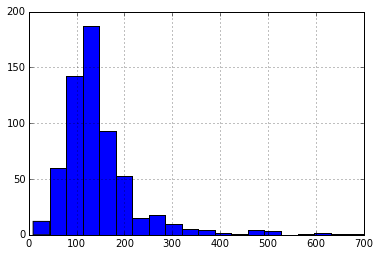

In [100]:
# Histogram을 그려보면 실제로 extreme value가 있다.
# 그렇기 때문에 extrme value의 값들을 outliers로서 처리하기 전에 log transformation을 해주자. outliers의 영향력을 무효화 하기 위해
df['LoanAmount'].hist(bins=20)

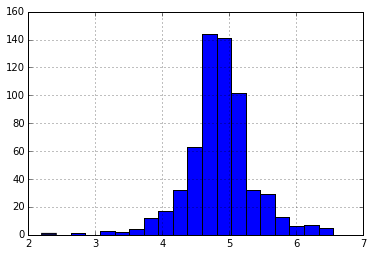

In [150]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
# 결과적으로 분포가 normal에 많이 가까워졌다. extreme values의 영향이 상당히 완화가 되었다

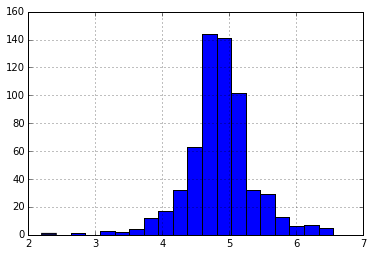

In [151]:
# applicants가 낮은 income이 있지만 strong co-applicants가 있을 것이여? 두개를 하볓서 np.log transformation을 하자... 왜?ㅇ
# 위에서 ApplicantIncome과 CoapplicantIncome의 값의 분포가 extreme values 때문에 data muning이 필요했다.
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

In [109]:
# Building a Predictive Model in Python

In [146]:
# 위 작업을 통해서 데이터를 modeling하기 좋게 형태를 만들었습니다. scikit=learn을 통해서 predictive model을 만들어보려고 합니다. 
# scikitlearn은 numerical data만 허용하기 때문에 categorical variables을 numeric하게 변경을 해주어야 합니다.

from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [143]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [142]:
df['Credit_History'] = df['Credit_History'].fillna(1)

In [144]:
# Logistic Regression
# 여기서 predictor_var의 값이 NaN이면 안되기 때문에 위에서 0으로 채움 
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)


Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [147]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)
# features을 추가하면 accuracy가 높아질것으로 예상을 했으나, 변화가 없었다.
# 그 말은 Credit_History가 다른 features에 비해 우세하다는 영향력이 더 의미 있다고 할 수 있다.


Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [148]:
# Decision Tree
# 보통 Decision Tree는 logistic regression model보다 더 높은 accuracy를 갖는다고 알려져 있다.

model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [152]:
# We can try different combination of variables: 
# 위의 모든 data가 categorical variables이기 때문에 Credit_History보다 impact가 없다... 그래서 numerical variables로 변경하면
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)
# 내용을 보면 accuracy는 올라갔지만, cross-validation score는 떨어진 것을 볼 수 있다. 즉 이 모델인 over-fitting됬다고 할 수 있다.

Accuracy : 88.925%
Cross-Validation Score : 68.883%


In [153]:
# Random Forest
# Random Forest의 장점은 featuer의 importances를 반환해준다는게 장점이다 
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log', 'TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)
# Accuracy가 100%의 값이 나오는 것을 볼 수 있다. overffiting이 된건데, 해결하기 위한 방법은 아래와 같다.
# Reducing the number of predictors
# Tuning the model parameters


Accuracy : 100.000%
Cross-Validation Score : 77.039%


In [154]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print featimp

Credit_History      0.267269
TotalIncome_log     0.253663
LoanAmount_log      0.228351
Dependents          0.057279
Property_Area       0.051003
Loan_Amount_Term    0.043376
Gender              0.030116
Married             0.024297
Education           0.023163
Self_Employed       0.021481
dtype: float64


In [156]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log', 'LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)
# Accuracy가 낮아진 것을 볼 수 있지만, cross-validation의 값이 증가한것을 알 수 있다.
# random forest는 값을 돌릴때마다 randomize때문에 다소 다른 값을 나타낸다. 

Accuracy : 82.085%
Cross-Validation Score : 80.622%
